In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # For visualizations


# Replace "your_dataset.csv" with the actual file path
df = pd.read_csv("/Users/amananku/Downloads/recipes5.csv")




In [3]:
# Print the dataset before cleaning (optional)
print("Dataset before cleaning:")
print(df.head())  # Print the first few rows

Dataset before cleaning:
       Recipe Name                                        Ingredients
0   Baked Macaroni  Elbow macaroni, Cheddar cheese, Milk, Butter, ...
1   Baked Macaroni  Elbow macaroni, Cheddar cheese, Milk, Butter, ...
2   Baked Macaroni  Elbow macaroni, Cheddar cheese, Milk, Butter, ...
3  Chicken Fajitas  Chicken breast, Bell peppers, Onion, Fajita se...
4  Chicken Fajitas  Chicken breast, Bell peppers, Onion, Fajita se...


In [4]:
# Data Preprocessing
# Handle duplicate rows (optional)
df = df.drop_duplicates()
df = df.astype(str)

In [5]:
df["Ingredients"] = df["Ingredients"].str.lower()
df["Ingredients"] = df["Ingredients"].str.replace("[^a-zA-Z\d\s]", "", regex=True)  # Modified regex for numbers
df["Ingredients"] = df["Ingredients"].str.split()


# Check for special characters (optional)
special_chars = df["Ingredients"].apply(lambda ingredients: any(char not in " ,\w" for char in ingredients))
df_special_chars = df[special_chars]

In [6]:

# Handle special characters as needed (e.g., remove rows, manually replace)
# Print the dataset after cleaning
print("\nDataset after cleaning:")
print(df.head())  # Print the first few rows again


Dataset after cleaning:
           Recipe Name                                        Ingredients
0       Baked Macaroni  [elbow, macaroni, cheddar, cheese, milk, butte...
3      Chicken Fajitas  [chicken, breast, bell, peppers, onion, fajita...
5       Spinach Salad   [baby, spinach, strawberries, feta, cheese, al...
6        Tofu Stir-Fry  [tofu, broccoli, bell, peppers, carrots, soy, ...
7  Lemon Garlic Shrimp  [shrimp, lemon, juice, garlic, olive, oil, par...


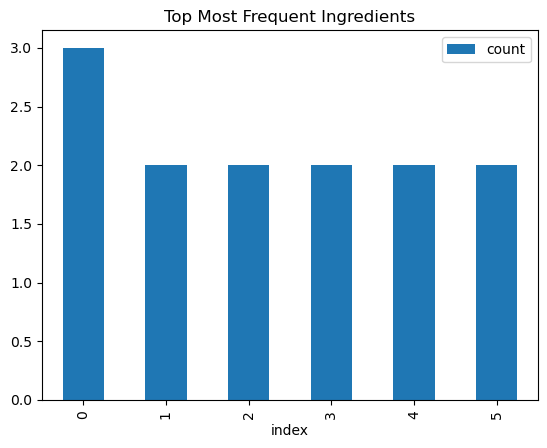

In [10]:
# Further Analysis (examples)
# Common ingredients
ingredient_counts = df["Ingredients"].explode().value_counts().reset_index(name="count")
top_ingredients = ingredient_counts[ingredient_counts["count"] >= 2]  # Adjust threshold as needed
top_ingredients.reset_index(inplace=True)
top_ingredients.plot(x="index", y="count", kind="bar")

plt.title("Top Most Frequent Ingredients")
plt.show()

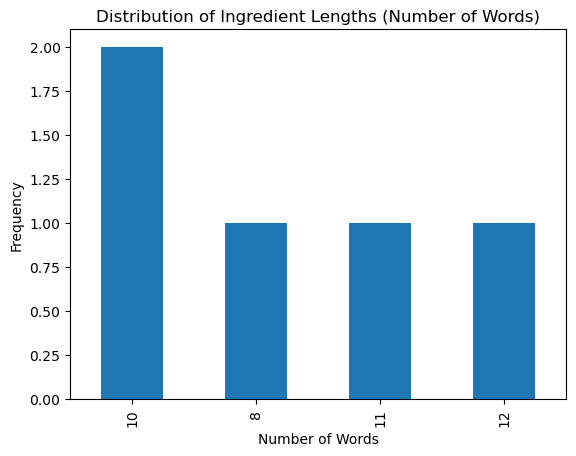

In [9]:
# Ingredient length distribution
ingredient_lengths = df["Ingredients"].str.len()
ingredient_lengths.value_counts().plot(kind="bar")
plt.title("Distribution of Ingredient Lengths (Number of Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Define common allergens (modify as needed)
allergen_list = ["milk", "eggs", "peanuts", "soy", "wheat", "fish", "crustaceans", "tree nuts", "sesame seeds"]


# Identify recipes containing allergens
df["contains_allergens"] = df["Ingredients"].apply(
    lambda ingredients: any(allergen in ingredients for allergen in allergen_list)
)

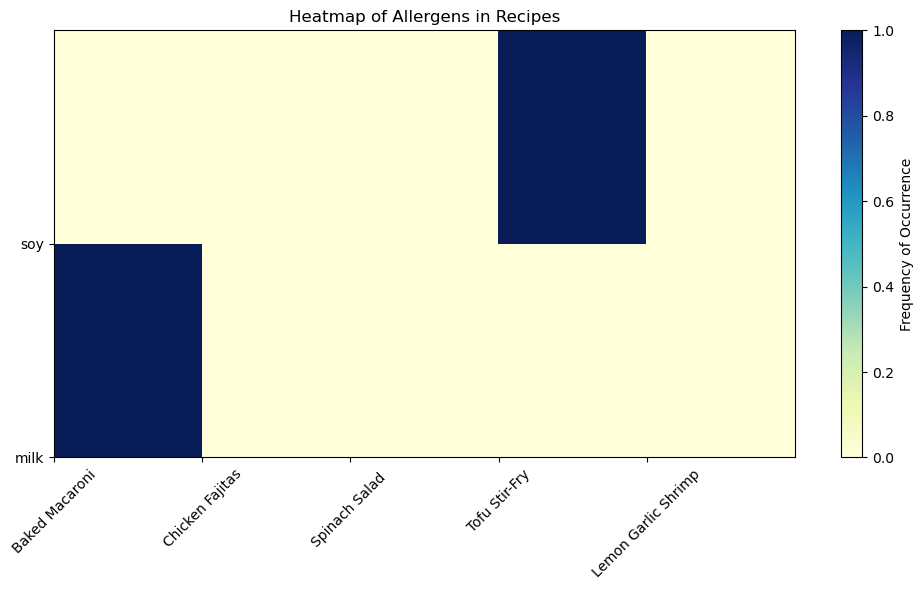

In [14]:
# Create a dictionary to store allergen counts per recipe
recipe_allergen_counts = {}
for index, row in df.iterrows():
    recipe_name = row["Recipe Name"]
    ingredients = row["Ingredients"]
    present_allergens = [allergen for allergen in allergen_list if allergen in ingredients]

    if recipe_name not in recipe_allergen_counts:
        recipe_allergen_counts[recipe_name] = {}

    for allergen in present_allergens:
        if allergen in recipe_allergen_counts[recipe_name]:
            recipe_allergen_counts[recipe_name][allergen] += 1
        else:
            recipe_allergen_counts[recipe_name][allergen] = 1
            

            
            
# Heatmap visualization
# --------------------
df_allergens = pd.DataFrame(recipe_allergen_counts).fillna(0)  # Convert dictionary to DataFrame, fill missing values with 0
plt.figure(figsize=(10, 6))
plt.pcolor(df_allergens, vmin=0, vmax=df_allergens.max().max(), cmap='YlGnBu')  # Colormap for intensity visualization
plt.colorbar(label='Frequency of Occurrence')
plt.xticks(range(len(df_allergens.columns)), df_allergens.columns, rotation=45)  # Rotate allergen labels for readability
plt.yticks(range(len(df_allergens.index)), df_allergens.index)  # Set recipe labels
plt.title("Heatmap of Allergens in Recipes")
plt.tight_layout()
plt.show()

Enter the ingredient you want to search for: dd


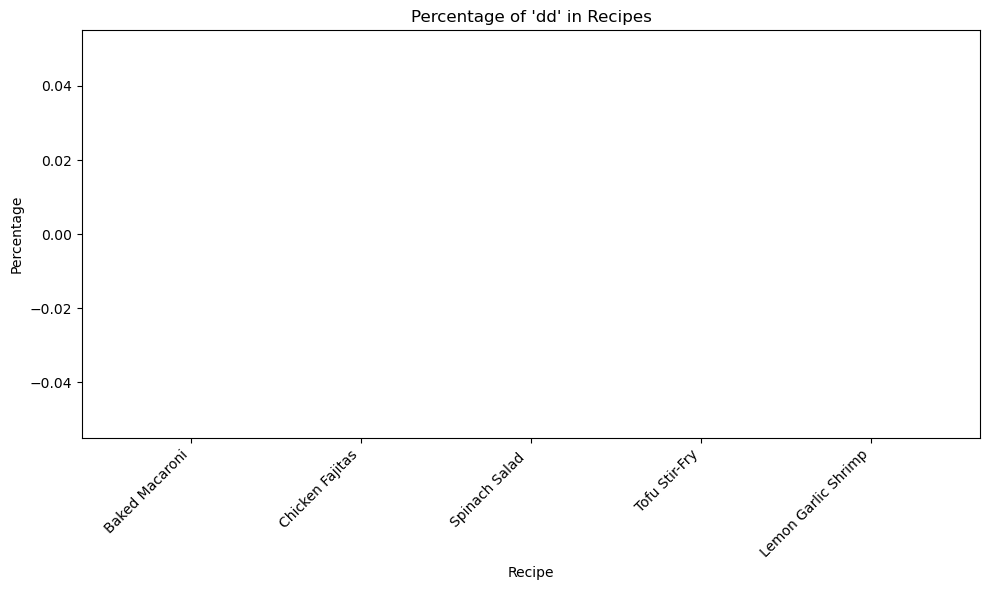

In [13]:
# Extra Feature: User Input for Specific Ingredient and Percentage Visualization
user_ingredient = input("Enter the ingredient you want to search for: ").lower()
ingredient_percentages = {}
for recipe, ingredients in zip(df["Recipe Name"], df["Ingredients"]):
    ingredient_percentages[recipe] = (ingredients.count(user_ingredient) / len(ingredients)) * 100

plt.figure(figsize=(10, 6))
plt.bar(ingredient_percentages.keys(), ingredient_percentages.values())
plt.title(f"Percentage of '{user_ingredient}' in Recipes")
plt.xlabel("Recipe")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()